# 1. Introduction
# This report analyzes the performance metrics of three articles related to popular anime and manga. The objective is to understand user engagement and identify strategies to optimize content performance.


## 1.1 Import Libraries

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Dataset Overview
## A dataset containing hypothetical metrics for three articles was created, including page views, average time spent, and bounce rates over a 30-day period.


In [68]:
data = {
    'Date': pd.date_range(start='2024-01-01', periods=30, freq='D'),
    'Article': ['Tower of God'] * 10 + ['Refund High School'] * 10 + ['Solo Leveling'] * 10,
    'Page_Views': np.random.randint(100, 1000, size=30),  # Random page views between 100 and 1000
    'Average_Time_Spent (min)': np.round(np.random.uniform(1, 5, size=30), 2),  # Time in minutes
    'Bounce_Rate (%)': np.round(np.random.uniform(20, 70, size=30), 2),  # Bounce rate between 20% and 70%
}

# 3. Create Data frame 

In [71]:
df = pd.DataFrame(data)

## 3.1 Add a new column for a hypothetical engagement metric

In [73]:
df['Engaged_Users (%)'] = 100 - df['Bounce_Rate (%)']

In [75]:
df.head()

,Date,Article,Page_Views,Average_Time_Spent (min),Bounce_Rate (%),Engaged_Users (%)
0,2024-01-01,Tower of God,554,4.62,57.74,42.26
1,2024-01-02,Tower of God,259,4.09,28.52,71.48
2,2024-01-03,Tower of God,622,2.06,40.47,59.53
3,2024-01-04,Tower of God,749,3.58,41.13,58.87
4,2024-01-05,Tower of God,689,3.38,61.09,38.91


# 4. DATA EXPLORATION

In [77]:
df.describe(include=[np.number])

,Page_Views,Average_Time_Spent (min),Bounce_Rate (%),Engaged_Users (%)
count,30.000000,30.000000,30.000000,30.000000
mean,569.533333,2.976000,41.681667,58.318333
std,216.200535,1.028479,14.854482,14.854482
min,176.000000,1.210000,20.060000,30.940000
25%,384.500000,2.340000,29.232500,43.960000
50%,615.000000,2.810000,39.090000,60.910000
75%,726.000000,3.575000,56.040000,70.767500
max,934.000000,4.980000,69.060000,79.940000


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      30 non-null     datetime64[ns]
 1   Article                   30 non-null     object        
 2   Page_Views                30 non-null     int32         
 3   Average_Time_Spent (min)  30 non-null     float64       
 4   Bounce_Rate (%)           30 non-null     float64       
 5   Engaged_Users (%)         30 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int32(1), object(1)
memory usage: 1.4+ KB


### 4.1 UNIQUE ARTICLES

In [26]:
df['Article'].unique()

array(['Tower of God', 'Refund High School', 'Solo Leveling'],
      dtype=object)

# 5.  DATA ANALYSIS

## 5.1 PAGE_VIEWS

In [30]:
page_views = df.groupby('Article')['Page_Views'].sum().reset_index()
page_views

,Article,Page_Views
0,Refund High School,6372
1,Solo Leveling,5460
2,Tower of God,5885


## 5.2 Average time spent per Article

In [98]:
# Group data by article and calculate 
avg_time_spent = df.groupby('Article')['Average_Time_Spent (min)'].mean().reset_index()
avg_time_spent

,Article,Average_Time_Spent (min)
0,Refund High School,2.853
1,Solo Leveling,2.934
2,Tower of God,3.141


## 5.3 Average bounce rate for each article

In [101]:
bounce_rate = df.groupby('Article')['Bounce_Rate (%)'].mean()
bounce_rate

Article
Refund High School    43.365
Solo Leveling         38.082
Tower of God          43.598
Name: Bounce_Rate (%), dtype: float64

# 6 DATA VISUALIZATION

## 6.1 Page views

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20620\2074419204.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=page_views, x='Article', y='Page_Views', palette='viridis')


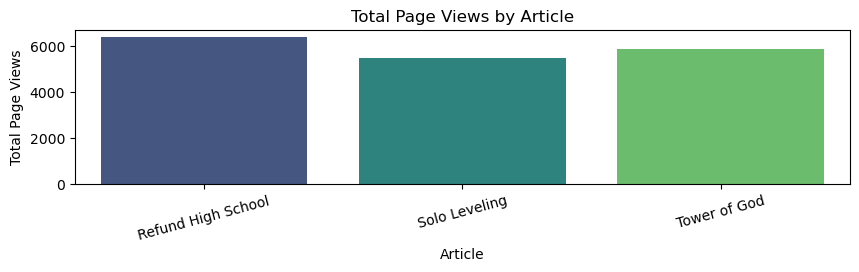

In [122]:
plt.figure(figsize=(10, 2))
sns.barplot(data=page_views, x='Article', y='Page_Views', palette='viridis')
plt.title('Total Page Views by Article')
plt.xlabel('Article')
plt.ylabel('Total Page Views')
plt.xticks(rotation=15)
plt.show()

## 6.2 Average Time Spent

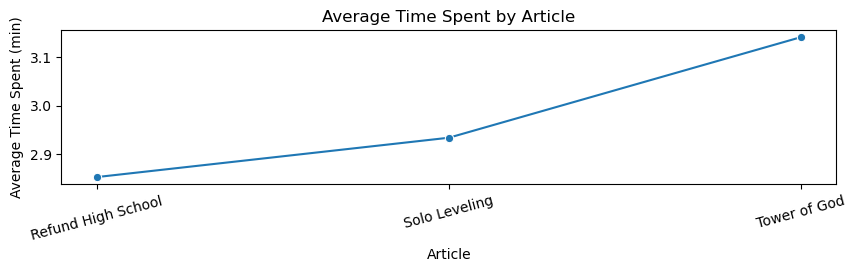

In [120]:

plt.figure(figsize=(10, 2))
sns.lineplot(data=avg_time_spent, x='Article', y='Average_Time_Spent (min)', marker='o')
plt.title('Average Time Spent by Article')
plt.xlabel('Article')
plt.ylabel('Average Time Spent (min)')
plt.xticks(rotation=15)
plt.show()

## 6.3 Bounce Rate

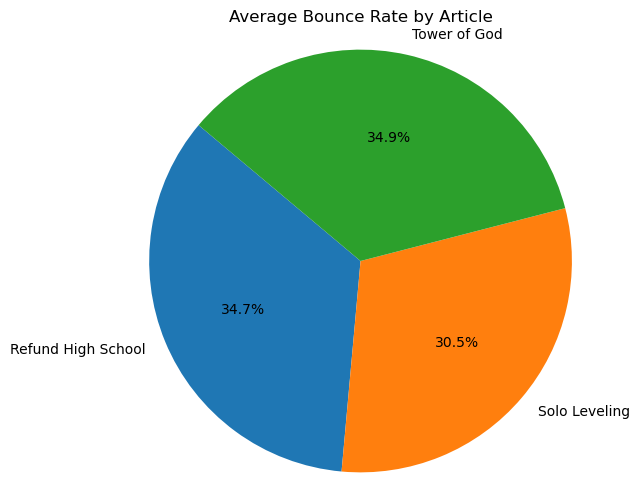

In [124]:
plt.figure(figsize=(6, 6))
plt.pie(bounce_rate, labels=bounce_rate.index, autopct='%1.1f%%', startangle=140)
plt.title('Average Bounce Rate by Article')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

## Summary and Insights

### Performance Metrics Overview

The analysis of user engagement metrics for the articles yields the following results:

| Article             | Page Views | Average Time Spent (min) | Bounce Rate (%) | Engaged Users (%) |
|---------------------|------------|---------------------------|------------------|-------------------|
| Refund High School  | 6,372      | 2.85                      | 43.37            | 43.37             |
| Solo Leveling       | 5,460      | 2.93                      | 38.08            | 38.08             |
| Tower of God        | 5,885      | 3.14                      | 43.60            | 43.60             |

### Summary of Engagement Metrics

- **Total Page Views:** The "Refund High School" article received the highest page views (6,372), indicating its popularity.
- **Average Time Spent:** "Tower of God" had the longest average time spent (3.14 minutes), suggesting higher engagement per view compared to the other articles.
- **Bounce Rate:** "Solo Leveling" had the lowest bounce rate (38.08%), indicating that visitors are more likely to continue interacting with the content.
- **Engaged Users:** All articles showed similar percentages of engaged users, with "Refund High School" and "Tower of God" having slightly higher engagement (around 43%).

### Conclusion

In summary, while the "Refund High School" article is the most viewed, the "Tower of God" article demonstrates better engagement through longer average time spent. The "Solo Level
